#*INFO*

* **TARIC**

  **220410** - Sparkling wine with DO
  * 2204 10 11 00 - **Champagne**
  * 2204 10 13 00 - **Cava**
  * 2204 10 15 00 - **Prosecco**

* **DATA SOURCES**

  [DATACOMEX](https://comercio.serviciosmin.gob.es/Datacomex/)

#**0 | IMPORTS**

* **GOOGLE COLAB**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


* **LIBRARIES & PACKAGES**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns',None)

import warnings
warnings.filterwarnings("ignore")

* **DATASET LOAD**

In [ ]:
#EUR
path_2017_eur = ''
path_2018_eur = ''
path_2019_eur = ''
path_2020_eur = ''
path_2021_eur = ''
path_2022_eur = ''
path_2023_eur = ''
path_2024_eur = ''

#TON
path_2017_ton = ''
path_2018_ton = ''
path_2019_ton = ''
path_2020_ton = ''
path_2021_ton = ''
path_2022_ton = ''
path_2023_ton = ''
path_2024_ton = ''

In [ ]:
#EUR
df_2017_eur = pd.read_excel(path_2017_eur)
df_2018_eur = pd.read_excel(path_2018_eur)
df_2019_eur = pd.read_excel(path_2019_eur)
df_2020_eur = pd.read_excel(path_2020_eur)
df_2021_eur = pd.read_excel(path_2021_eur)
df_2022_eur = pd.read_excel(path_2022_eur)
df_2023_eur = pd.read_excel(path_2023_eur)
df_2024_eur = pd.read_excel(path_2024_eur)

#TON
df_2017_ton = pd.read_excel(path_2017_ton)
df_2018_ton = pd.read_excel(path_2018_ton)
df_2019_ton = pd.read_excel(path_2019_ton)
df_2020_ton = pd.read_excel(path_2020_ton)
df_2021_ton = pd.read_excel(path_2021_ton)
df_2022_ton = pd.read_excel(path_2022_ton)
df_2023_ton = pd.read_excel(path_2023_ton)
df_2024_ton = pd.read_excel(path_2024_ton)

* **CONCAT**

In [ ]:
df_eur = pd.concat([df_2017_eur,df_2018_eur,df_2019_eur,df_2020_eur,df_2021_eur,df_2022_eur,df_2023_eur,df_2024_eur])
df_ton = pd.concat([df_2017_ton,df_2018_ton,df_2019_ton,df_2020_ton,df_2021_ton,df_2022_ton,df_2023_ton,df_2024_ton])

In [ ]:
df_eur.rename(columns={'valor': 'EUR'}, inplace=True)
df_ton.rename(columns={'valor': 'TON'}, inplace=True)

* **MERGE**

In [ ]:
df = df_eur.merge(df_ton)

* **DATASET CHECK**

In [ ]:
df.head()

,fila,subfila,columna,subcolumna,EUR,TON
0,001 Francia,NaN,Enero de 2017,EXPORT,"1828,25","530,93"
1,003 Países Bajos,NaN,Enero de 2017,EXPORT,"610,71","188,50"
2,004 Alemania,NaN,Enero de 2017,EXPORT,"2043,60","696,38"
3,005 Italia,NaN,Enero de 2017,EXPORT,"5,81","1,88"
4,006 Reino Unido,NaN,Enero de 2017,EXPORT,"1038,64","380,83"


#**1 | DATA CLEANING**

##**1.1 COLUMNS**

###**1.1.1 | COLUMS DROP** ['subfila'], ['subcolumna']

In [ ]:
df.drop(columns=['subfila','subcolumna'],inplace=True)

###**1.1.2 | COUNTRY** ['country'], ['fila']

* **COLUMN GENERATION**

In [ ]:
df['country'] = df['fila'].str[4:]
df.drop(columns=['fila'],inplace=True)

* **VALUE CHECK & DROP**

In [ ]:
df['country'].unique()

array(['Francia', 'Países Bajos', 'Alemania', 'Italia', 'Reino Unido',
       'Irlanda', 'Dinamarca', 'Grecia', 'Portugal', 'Bélgica',
       'Luxemburgo', 'Islandia', 'Noruega', 'Suecia', 'Finlandia',
       'Liechtenstein', 'Austria', 'Suiza', 'Andorra', 'Gibraltar',
       'Malta', 'Turquía', 'Estonia', 'Letonia', 'Lituania', 'Polonia',
       'República Checa', 'Eslovaquia', 'Hungría', 'Rumanía', 'Bulgaria',
       'Ucrania', 'Bielorusia', 'Rusia', 'Kazajstán', 'Eslovenia',
       'Croacia', 'Kosovo', 'Montenegro', 'Serbia', 'Marruecos', 'Túnez',
       'Egipto', 'Cabo Verde', 'Senegal', 'Gambia', 'Liberia',
       'Costa de Marfil', 'Ghana', 'Togo', 'Benin', 'Nigeria',
       'República Centroafricana', 'Guinea Ecuatorial', 'Gabón',
       'R.D. del Congo', 'Angola', 'Kenia', 'Uganda', 'Tanzania',
       'Mauricio', 'Sudáfrica', 'Estados Unidos', 'Canadá', 'México',
       'Bermudas', 'Guatemala', 'Belice', 'Honduras', 'El Salvador',
       'Nicaragua', 'Costa Rica', 'Panamá', 'Cu

In [ ]:
country_drop = ['Avituall.y combust.intercambios comunitarios',
                'Países y territorios no determinados.Intraco.',
                'Países y territorios no determinados.Extraco.',
                'Avituallamiento terceros']

df = df[~df['country'].isin(country_drop)]
df.reset_index(drop=True, inplace=True)

* **TRANSLATE NAMES TO ENGLISH**

In [ ]:
country_dict = {
    'Finlandia':'Finland',
    'Francia': 'France',
    'Países Bajos': 'Netherlands',
    'Alemania': 'Germany',
    'Italia': 'Italy',
    'Reino Unido': 'United Kingdom',
    'Irlanda': 'Ireland',
    'Grecia': 'Greece',
    'Portugal': 'Portugal',
    'Bélgica': 'Belgium',
    'Suecia': 'Sweden',
    'Suiza': 'Switzerland',
    'Andorra': 'Andorra',
    'Gibraltar': 'Gibraltar',
    'Malta': 'Malta',
    'Marruecos': 'Morocco',
    'Túnez': 'Tunisia',
    'Mauritania': 'Mauritania',
    'Estados Unidos': 'United States',
    'Cuba': 'Cuba',
    'Chile': 'Chile',
    'Chipre': 'Cyprus',
    'Arabia Saudí': 'Saudi Arabia',
    'Emiratos Árabes Unidos': 'United Arab Emirates',
    'Corea del Sur (Rep. de Corea)': 'South Korea',
    'Corea del Norte (Rep.Pop.Dem.de Corea)':'North Korea',
    'Japón': 'Japan',
    'Taiwán': 'Taiwan (China)',
    'Macao':'Macao (China)',
    'Israel': 'Israel',
    'Jordania': 'Jordan',
    'Kuwait': 'Kuwait',
    'Omán': 'Oman',
    'Noruega': 'Norway',
    'Polonia': 'Poland',
    'Eslovenia': 'Slovenia',
    'Brasil': 'Brazil',
    'Tailandia': 'Thailand',
    'Argelia': 'Algeria',
    'República Dominicana': 'Dominican Republic',
    'Austria': 'Austria',
    'Honduras': 'Honduras',
    'Dinamarca': 'Denmark',
    'Turquía': 'Turkey',
    'Rumanía': 'Romania',
    'Liberia': 'Liberia',
    'Venezuela': 'Venezuela',
    'Malasia': 'Malaysia',
    'San Marino': 'San Marino',
    'Líbano': 'Lebanon',
    'Siria': 'Syria',
    'Qatar': 'Qatar',
    'Libia': 'Libya',
    'India': 'India',
    'Hong-Kong': 'Hong Kong (China)',
    'Luxemburgo': 'Luxembourg',
    'Albania': 'Albania',
    'Rusia': 'Russia',
    'Senegal': 'Senegal',
    'Brunei Darussalam': 'Brunei',
    'Gambia': 'Gambia',
    'Irán': 'Iran',
    'Vietnam': 'Vietnam',
    'Filipinas': 'Philippines',
    'Lituania': 'Lithuania',
    'Bulgaria': 'Bulgaria',
    'Serbia': 'Serbia',
    'Mauricio': 'Mauritius',
    'Comoras': 'Comoros',
    'Panamá': 'Panama',
    'Singapur': 'Singapore',
    'República Checa': 'Czech Republic',
    'Egipto': 'Egypt',
    'Tanzania': 'Tanzania',
    'Pakistán': 'Pakistan',
    'China': 'China (Mainland)',
    'Islandia': 'Iceland',
    'El Salvador': 'El Salvador',
    'Jamaica': 'Jamaica',
    'Ecuador': 'Ecuador',
    'Irak': 'Iraq',
    'Afganistán': 'Afghanistan',
    'Togo': 'Togo',
    'Guinea Ecuatorial': 'Equatorial Guinea',
    'México': 'Mexico',
    'Uruguay': 'Uruguay',
    'Bahrein': 'Bahrain',
    'Sri Lanka': 'Sri Lanka',
    'Australia': 'Australia',
    'Nueva Caledonia y dependencias': 'New Caledonia',
    'Benin': 'Benin',
    'Djibouti': 'Djibouti',
    'Costa Rica': 'Costa Rica',
    'Colombia': 'Colombia',
    'Seychelles': 'Seychelles',
    'Canadá': 'Canada',
    'Guatemala': 'Guatemala',
    'Bahamas': 'Bahamas',
    'Perú': 'Peru',
    'Bangladesh': 'Bangladesh',
    'Barbados': 'Barbados',
    'Islas Feroe': 'Faroe Islands',
    'Hungría': 'Hungary',
    'Letonia': 'Latvia',
    'Eslovaquia': 'Slovakia',
    'Kenia': 'Kenya',
    'Indonesia': 'Indonesia',
    'Islas Marshall': 'Marshall Islands',
    'Ucrania': 'Ukraine',
    'Bielorusia': 'Belarus',
    'Kazajstán': 'Kazakhstan',
    'Croacia': 'Croatia',
    'Cabo Verde': 'Cape Verde',
    'Costa de Marfil': 'Ivory Coast',
    'República Centroafricana': 'Central African Republic',
    'Guinea Ecuatorial': 'Equatorial Guinea',
    'Gabón': 'Gabon',
    'R.D. del Congo': 'Democratic Republic of the Congo',
    'Sudáfrica': 'South Africa',
    'Bermudas': 'Bermuda',
    'Belice': 'Belize',
    'El Salvador': 'El Salvador',
    'Costa Rica': 'Costa Rica',
    'Panama': 'Panama',
    'Haití': 'Haiti',
    'Islas Turcas y Caicos': 'Turks and Caicos Islands',
    'Islas Vírgenes (EEUU)': 'United States Virgin Islands',
    'Antigua y Barbuda': 'Antigua and Barbuda',
    'Islas Caimán': 'Cayman Islands',
    'Santa Lucía': 'Saint Lucia',
    'San Vicente y Granadinas': 'Saint Vincent and the Grenadines',
    'Islas Vírgenes (GB)': 'British Virgin Islands',
    'Trinidad y Tobago': 'Trinidad and Tobago',
    'Bonaire, San Eustaquio y Saba': 'Bonaire, Sint Eustatius, and Saba',
    'San Martín': 'Saint Martin',
    'Islas Maldivas': 'Maldives',
    'Camboya (Campuchea)': 'Cambodia',
    'Nueva Zelanda': 'New Zealand',
    'Turkmenistán': 'Turkmenistan',
    'Burkina Faso (ant. Alto Volta)': 'Burkina Faso',
    'Guinea Bissau': 'Guinea-Bissau',
    'Camerún': 'Cameroon',
    'San Pedro y Miquelón': 'Saint Pierre and Miquelon',
    'Santo Tomé y Príncipe': 'São Tomé and Príncipe',
    'San Cristóbal y Nieves': 'Saint Kitts and Nevis',
    'Macedonia del Norte': 'North Macedonia',
    'Sierra Leona': 'Sierra Leone',
    'Moldavia': 'Moldova',
    'Uzbekistán': 'Uzbekistan',
    'Níger': 'Niger',
    'Islas Malvinas (Falkland)': 'Falkland Islands',
    'Islas Virgenes (EEUU)': 'United States Virgin Islands',
    'Islas Virgenes (GB)': 'British Virgin Islands',
    'Bonaire, Sint Eustatius, and Saba': 'Bonaire, Saint Eustatius, and Saba',
    'Burkina Faso (formerly Upper Volta)': 'Burkina Faso',
    'Ruanda': 'Rwanda',
    'Sudán': 'Sudan',
    'Azerbaiján': 'Azerbaijan'
}

In [ ]:
df['country'].replace(country_dict, inplace=True)

###**1.1.3 | DATES** - ['year'], ['month'], ['date']

In [ ]:
df['year'] = df['columna'].str[-4:]
df['year'] = df['year'].astype('int')

In [ ]:
df['month']=df['columna'].str[:-4]
month_dict = {
    'Enero de ': 1, 'Febrero de ': 2, 'Marzo de ': 3, 'Abril de ': 4,
    'Mayo de ': 5, 'Junio de ': 6,'Julio de ': 7, 'Agosto de ': 8,
    'Septiembre de ': 9, 'Octubre de ': 10, 'Noviembre de ': 11, 'Diciembre de ': 12
}

df['month'].replace(month_dict,inplace=True)
df.drop(columns=['columna'],inplace=True)

In [ ]:
df['date'] = pd.to_datetime(df[['year', 'month']].assign(day=1)).dt.to_period('M')

###**1.1.4 | COMMAS TO DOTS** ['EUR'], ['TONS']

In [ ]:
df['EUR'] = df['EUR'].str.replace(',','.')
df['TON'] = df['TON'].str.replace(',','.')

df['EUR'] = df['EUR'].astype('float')
df['TON'] = df['TON'].astype('float')

##**1.2 | CHECK DUPLICATED VALUES**

In [ ]:
df[df.duplicated()]

,EUR,TON,country,year,month,date


##**1.3 | NULL VALUES**

In [ ]:
df.isnull().sum()

,0
EUR,5266
TON,5266
country,0
year,0
month,0
date,0


In [ ]:
df[df['EUR'].isna() & df['TON'].isna()]

,EUR,TON,country,year,month,date
15,NaN,NaN,Liechtenstein,2017,1,2017-01
20,NaN,NaN,Malta,2017,1,2017-01
21,NaN,NaN,Turkey,2017,1,2017-01
32,NaN,NaN,Belarus,2017,1,2017-01
34,NaN,NaN,Kazakhstan,2017,1,2017-01
...,...,...,...,...,...,...
13052,NaN,NaN,Cambodia,2024,12,2024-12
13053,NaN,NaN,Indonesia,2024,12,2024-12
13054,NaN,NaN,Malaysia,2024,12,2024-12
13057,NaN,NaN,Mongolia,2024,12,2024-12


In [ ]:
df.fillna(0,inplace=True)

##**1.4 | OUTLIERS**

In [ ]:
df.describe()

,EUR,TON,year,month
count,13068.000000,13068.000000,13068.000000,13068.000000
mean,233.346053,84.068431,2020.573921,6.500000
std,836.712711,329.525686,2.301982,3.452185
min,0.000000,0.000000,2017.000000,1.000000
25%,0.000000,0.000000,2019.000000,3.750000
50%,3.640000,0.860000,2021.000000,6.500000
75%,54.950000,14.700000,2023.000000,9.250000
max,9789.480000,4962.440000,2024.000000,12.000000


In [ ]:
df_not_zero = df[df['EUR']>0]

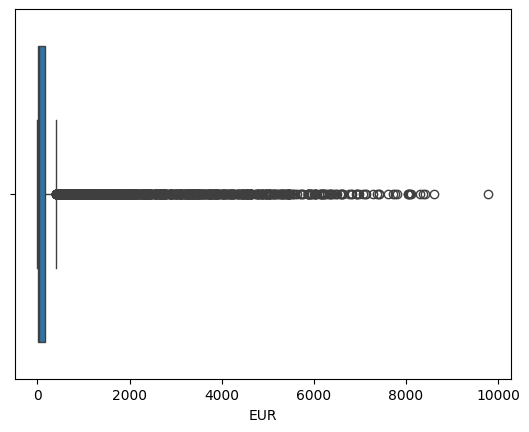

In [ ]:
sns.boxplot(data = df_not_zero,
            x = 'EUR',
            );

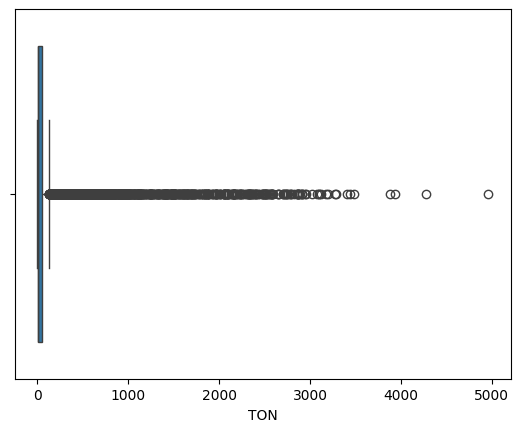

In [ ]:
sns.boxplot(data = df_not_zero,
            x = 'TON',
            );

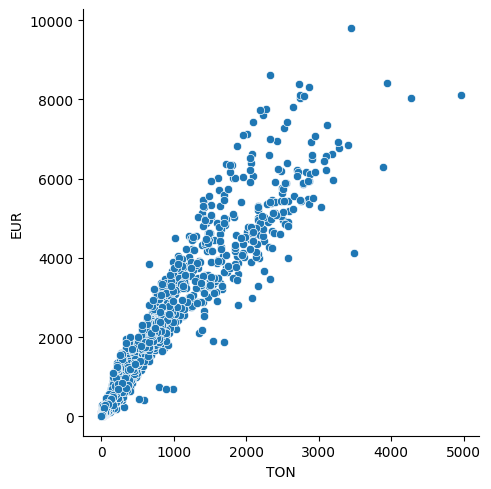

In [ ]:
sns.relplot(data = df_not_zero,
            x = 'TON',
            y = 'EUR',
            );

#**2 | FEATURE ENGINEERING**

##**2.1 | New column ['EUR_KG']**

In [ ]:
df['EUR_KG'] = df['EUR']/df['TON']

In [ ]:
df[df['EUR_KG'] == np.inf]

,EUR,TON,country,year,month,date,EUR_KG


###**2.1.1 | CORRECT INF VALUES - EUR == 0.01**

In [ ]:
df.loc[(df['EUR_KG'] == np.inf) & (df['EUR'] == 0.01), 'EUR'] = 0

In [ ]:
df['EUR_KG'] = df['EUR']/df['TON']

###**2.1.2 | CORRECT INF VALUES - COUNTRY CHECK**

In [ ]:
df.loc[(df['EUR_KG'] == np.inf) & (df['EUR'] != 0), 'EUR_KG'] = np.nan

In [ ]:
df[df['EUR_KG'].isna() & (df['EUR'] != 0)]

,EUR,TON,country,year,month,date,EUR_KG


The missing values on TON columns will be solved by:
1. Doing the average price (EUR_TON) from the previous and next month. Then apply the calculus to the TON column later.
2. If is missing any other value, just will be take the previous or next value.

In [ ]:
mean_values = df.groupby(['country', 'year'])['EUR_KG'].transform('mean')

In [ ]:
df.loc[df['EUR_KG'].isna() & (df['EUR'] != 0), 'EUR_KG'] = mean_values

###**2.1.3 | CORRECT MISSING VALUES IN df['TO'N] & ROUND**

In [ ]:
df['TON'] = df['EUR'] / df['EUR_KG']

In [ ]:
df['EUR_KG'] = round(df['EUR_KG'],3)

##**2.2 | New column ['region']**

In [ ]:
region_dict = {
    "Western Europe": [
        "France", "Netherlands", "Belgium", "Luxembourg", "United Kingdom",
        "Ireland", "Switzerland", "Austria", "Germany", "Liechtenstein"
    ],
    "Mediterranean Europe": [
        "Spain", "Portugal", "Italy", "Malta", "Andorra", "Gibraltar",
        "Cyprus", "San Marino", "Vatican City"
    ],
    "Northern Europe": [
        "Denmark", "Sweden", "Norway", "Finland", "Iceland", "Faroe Islands",
        "Estonia", "Latvia", "Lithuania"
    ],
    "Balkan Europe": [
        "Albania", "Bosnia-Herzegovina", "Bulgaria", "Croatia", "Montenegro",
        "North Macedonia", "Kosovo", "Serbia", "Slovenia", "Romania", "Greece"
    ],
    "Central Europe": [
        "Czech Republic", "Slovakia", "Hungary", "Poland"
    ],
    "Eastern Europe": [
        "Ukraine", "Belarus", "Russia", "Moldova"
    ],
    "North Africa": [
        "Morocco", "Tunisia", "Algeria", "Egypt", "Libya"
    ],
    "Sub-Saharan Africa": [
        "Cape Verde", "Senegal", "Gambia", "Liberia", "Ivory Coast", "Ghana",
        "Togo", "Benin", "Nigeria", "Central African Republic",
        "Equatorial Guinea", "Gabon", "Democratic Republic of the Congo",
        "Angola", "Kenya", "Uganda", "Tanzania", "Mauritius", "South Africa",
        "Sierra Leone", "Guinea", "Zambia", "Burkina Faso",
        "Guinea-Bissau", "Cameroon", "São Tomé and Príncipe", "Rwanda",
        "Mozambique", "Zimbabwe", "Namibia", "Niger", "Sudan", "Somalia","Seychelles","Mali","Congo"
    ],
    "Middle East": [
        "Lebanon", "Israel", "Jordan", "Bahrain", "Qatar", "United Arab Emirates",
        "Iraq", "Oman", "Saudi Arabia", "Syria", "Kuwait", "Yemen", "Palestine",
        "Iran", "Turkey"
    ],
    "East Asia": [
        "China (Mainland)", "Hong Kong (China)", "Macao (China)", "Taiwan (China)",
        "Japan", "South Korea", "North Korea", "Mongolia"
    ],
    "South Asia": [
        "India", "Maldives", "Sri Lanka", "Nepal", "Pakistan", "Afghanistan", "Bangladesh"
    ],
    "Southeast Asia": [
        "Myanmar", "Thailand", "Laos", "Vietnam", "Cambodia", "Indonesia",
        "Malaysia", "Singapore", "Philippines", "Brunei", "Timor-Leste"
    ],
    "North America": [
        "United States", "Canada", "Bermuda","Saint Pierre and Miquelon"
    ],
    "Central America and Caribbean": [
        "Mexico", "Guatemala", "Belize", "Honduras", "El Salvador", "Nicaragua",
        "Costa Rica", "Panama", "Cuba", "Haiti", "Bahamas",
        "Turks and Caicos Islands", "Dominican Republic", "United States Virgin Islands",
        "Antigua and Barbuda", "Cayman Islands", "Jamaica", "Saint Lucia",
        "Saint Vincent and the Grenadines", "British Virgin Islands", "Barbados",
        "Trinidad and Tobago", "Aruba", "Curaçao", "Bonaire, Saint Eustatius, and Saba",'Bonaire, Sint Eustatius, and Saba',
        "Saint Martin", "Saint Kitts and Nevis", "Dominica", "Anguilla"
    ],
    "South America": [
        "Colombia", "Venezuela", "Ecuador", "Peru", "Brazil", "Chile", "Bolivia",
        "Paraguay", "Uruguay", "Argentina", "Guyana", "Surinam","Falkland Islands"
    ],
    "Oceania": [
        "Australia", "New Zealand", "New Caledonia", "Guam", "Papua New Guinea",
        "Fiji", "Vanuatu", "Samoa", "Tonga", "Solomon Islands",
        "Marshall Islands", "Micronesia", "Kiribati", "Nauru", "Palau"
    ],
    "Central Asia and the Caucasus": [
        'Kazakhstan', 'Armenia', 'Turkmenistan', 'Georgia', 'Kirguistán',
        'Uzbekistan', 'Azerbaijan'
    ]

}

In [ ]:
def region(pais):
    for region, paises in region_dict.items():
        if pais in paises:
            return region
    return 'Unspecified'

df['region'] = df['country'].apply(region)

##**2.3 | New column ['market_union']**

In [ ]:
market_union_dict = {
    "European Union": [
        'France', 'Germany', 'Italy', 'Netherlands', 'Ireland', 'Denmark', 'Greece',
        'Portugal', 'Belgium', 'Luxembourg', 'Sweden', 'Finland', 'Austria', 'Poland',
        'Czech Republic', 'Slovakia', 'Hungary', 'Romania', 'Bulgaria', 'Estonia', 'Latvia',
        'Lithuania', 'Slovenia', 'Croatia', 'Cyprus', 'Malta'
    ],
    "EFTA": [
        'Norway', 'Iceland', 'Liechtenstein', 'Switzerland'
    ],
    "Mercosur & associated members": [
        'Brazil', 'Argentina', 'Paraguay', 'Uruguay', 'Venezuela','Bolivia',
        'Chile','Colombia','Ecuador','Guyana','Panama','Peru','Surinam'
    ],
    "USMCA": [
        'United States', 'Canada', 'Mexico'
    ],
    "ASEAN": [
        'Indonesia', 'Malaysia', 'Singapore', 'Thailand', 'Philippines', 'Vietnam', 'Brunei',
        'Myanmar', 'Laos', 'Cambodia'
    ],
    "Eurasian Economic Union": [
        'Russia', 'Kazakhstan', 'Belarus', 'Armenia', 'Kyrgyzstan'
    ]
}

In [ ]:
def market_union(pais):
    for market, paises in market_union_dict.items():
        if pais in paises:
            return market
    return 'None / Other'

df['market_union'] = df['country'].apply(market_union)

In [ ]:
df[df['market_union'] == 'None / Other']['country'].unique()

array(['United Kingdom', 'Andorra', 'Gibraltar', 'Turkey', 'Ukraine',
       'Kosovo', 'Montenegro', 'Serbia', 'Morocco', 'Tunisia', 'Egypt',
       'Cape Verde', 'Senegal', 'Gambia', 'Liberia', 'Ivory Coast',
       'Ghana', 'Togo', 'Benin', 'Nigeria', 'Central African Republic',
       'Equatorial Guinea', 'Gabon', 'Democratic Republic of the Congo',
       'Angola', 'Kenya', 'Uganda', 'Tanzania', 'Mauritius',
       'South Africa', 'Bermuda', 'Guatemala', 'Belize', 'Honduras',
       'El Salvador', 'Nicaragua', 'Costa Rica', 'Cuba', 'Haiti',
       'Bahamas', 'Turks and Caicos Islands', 'Dominican Republic',
       'United States Virgin Islands', 'Antigua and Barbuda',
       'Cayman Islands', 'Jamaica', 'Saint Lucia',
       'Saint Vincent and the Grenadines', 'British Virgin Islands',
       'Barbados', 'Trinidad and Tobago', 'Aruba', 'Curaçao',
       'Bonaire, Sint Eustatius, and Saba', 'Saint Martin', 'Lebanon',
       'Israel', 'Jordan', 'Bahrain', 'Qatar', 'United Arab Emirat

#**3 | EDA**

In [ ]:
df.sort_values(['EUR_KG'], ascending=False).head()

,EUR,TON,country,year,month,date,EUR_KG,region,market_union
2019,32.06,0.07,Cape Verde,2018,4,2018-04,458.000,Sub-Saharan Africa,None / Other
11865,3.65,0.02,Seychelles,2024,4,2024-04,182.500,Sub-Saharan Africa,None / Other
11616,5.22,0.05,Venezuela,2024,2,2024-02,104.400,South America,Mercosur & associated members
1101,2.99,0.05,Equatorial Guinea,2017,9,2017-09,59.800,Sub-Saharan Africa,None / Other
839,13.26,0.23,Equatorial Guinea,2017,7,2017-07,57.652,Sub-Saharan Africa,None / Other


In [ ]:
df[(df['country']=='Seychelles') & (df['EUR_KG']>0.01)]

,EUR,TON,country,year,month,date,EUR_KG,region,market_union
10571,0.17,0.03,Seychelles,2023,7,2023-07,5.667,Sub-Saharan Africa,None / Other
11865,3.65,0.02,Seychelles,2024,4,2024-04,182.500,Sub-Saharan Africa,None / Other


##**3.1 | UNIVARIABLE ANALYSIS**

###**3.1.1 | NUMERIC**

In [ ]:
df.describe()

,EUR,TON,year,month,EUR_KG
count,13068.000000,7799.000000,13068.000000,13068.000000,7799.000000
mean,233.346051,140.865045,2020.573921,6.500000,4.154392
std,836.712712,417.080731,2.301982,3.452185,6.045840
min,0.000000,0.010000,2017.000000,1.000000,0.201000
25%,0.000000,1.910000,2019.000000,3.750000,2.896000
50%,3.640000,9.150000,2021.000000,6.500000,3.718000
75%,54.950000,53.540000,2023.000000,9.250000,4.750000
max,9789.480000,4962.440000,2024.000000,12.000000,458.000000


###**3.1.2 | CATEGORIC**

##**3.2 | EDA**

In [ ]:
df_ = df[(df['EUR']!=0) & (df['TON']!=0) & (df['EUR_KG']<100)]

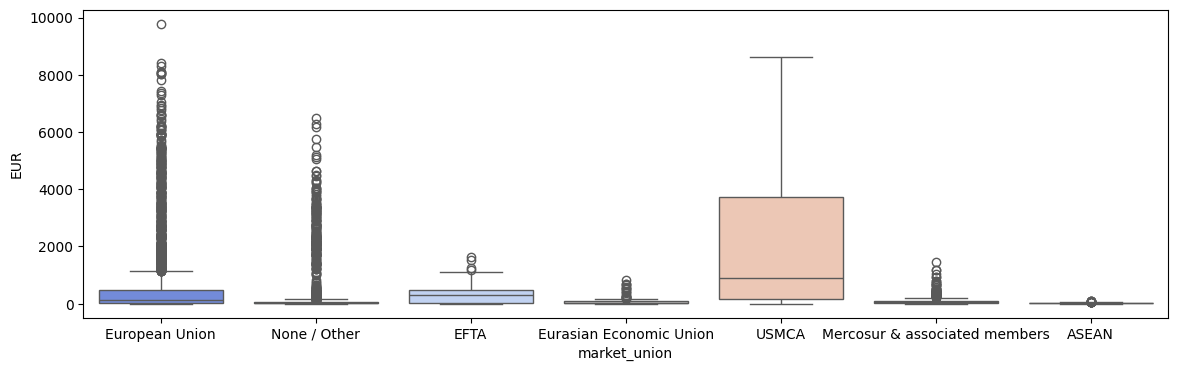

In [ ]:
#REGION AND TOTAL EURO
plt.figure(figsize=(14, 4))
sns.boxplot(x='market_union', y='EUR', data=df_, palette='coolwarm')
plt.xticks(rotation=0)
plt.show()

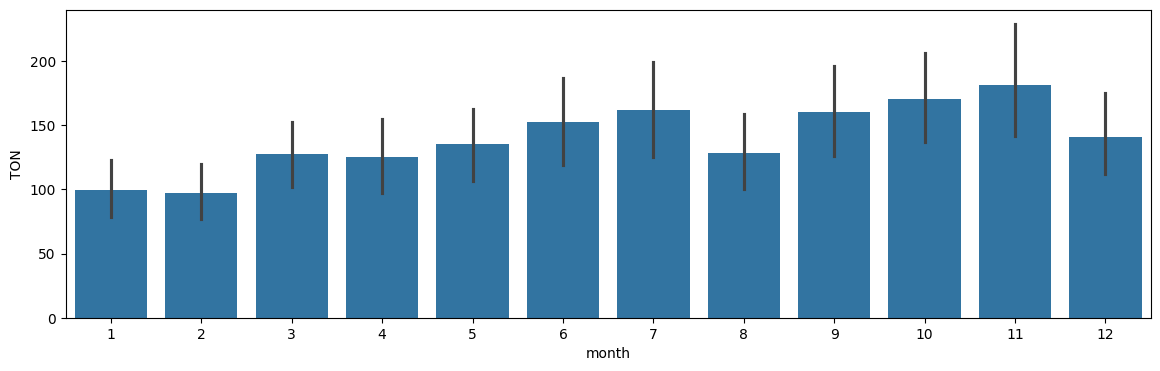

In [ ]:
plt.figure(figsize=(14, 4))
sns.barplot(x='month', y='TON', data=df_)
plt.show()

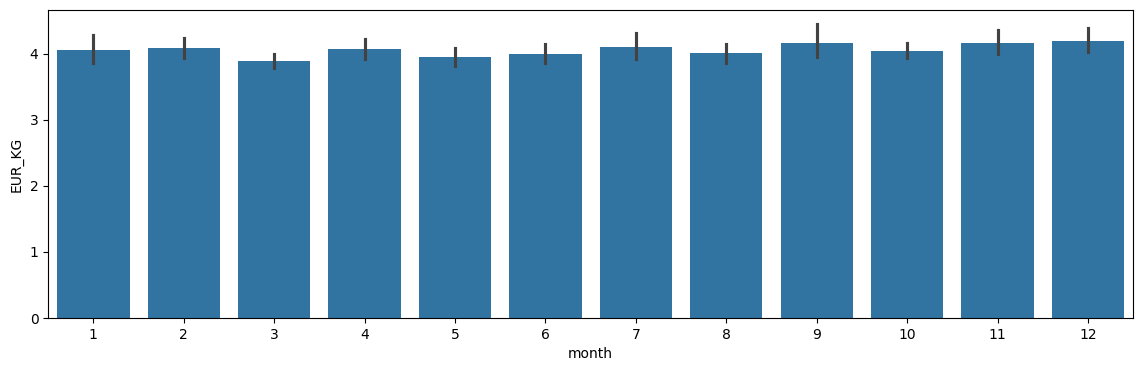

In [ ]:
plt.figure(figsize=(14, 4))
sns.barplot(x='month', y='EUR_KG', data=df_)
plt.show()

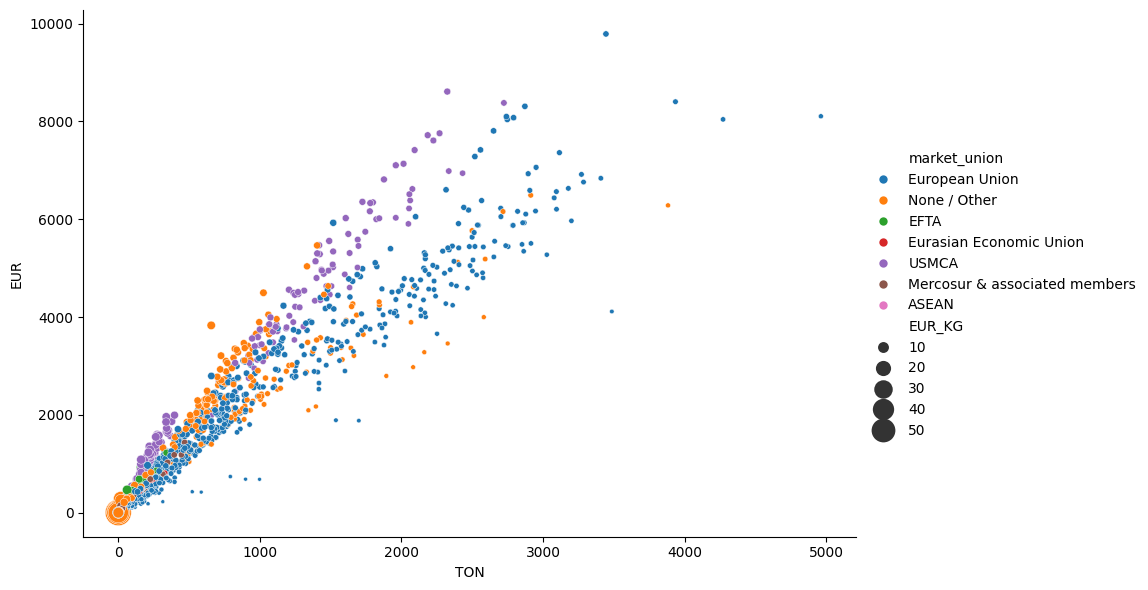

In [ ]:
    sns.relplot(
    data=df_,
    x='TON',
    y='EUR',
    size='EUR_KG',
    sizes=(5, 350),
    hue='market_union',
    aspect=1.5,
    height=6
)

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

##**3.2.3 | AVERAGE/MEDIAN PRICE: REGION VS ECONOMIC UNION**

---



* **AVG**

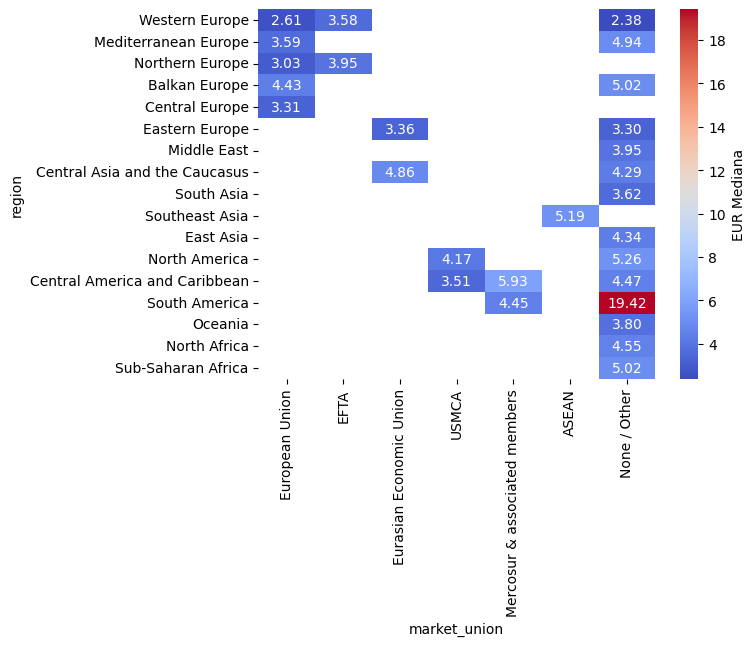

In [ ]:
pivot_table = pd.pivot_table(df_,
                             values='EUR_KG',
                             index='region',
                             columns='market_union',
                             aggfunc='mean')

order_rows = ['Western Europe', 'Mediterranean Europe', 'Northern Europe', 'Balkan Europe',
              'Central Europe', 'Eastern Europe', 'Middle East',
              'Central Asia and the Caucasus', 'South Asia', 'Southeast Asia', 'East Asia',
              'North America', 'Central America and Caribbean', 'South America',
              'Oceania',
              'North Africa', 'Sub-Saharan Africa']
order_columns = ['European Union', 'EFTA', 'Eurasian Economic Union', 'USMCA',
                 'Mercosur & associated members', 'ASEAN', 'None / Other']

pivot_table = pivot_table.loc[order_rows, order_columns]

sns.heatmap(pivot_table, annot=True, cmap='coolwarm', fmt='.2f', cbar_kws={'label': 'EUR Mediana'})
plt.show()


* **MEDIAN**

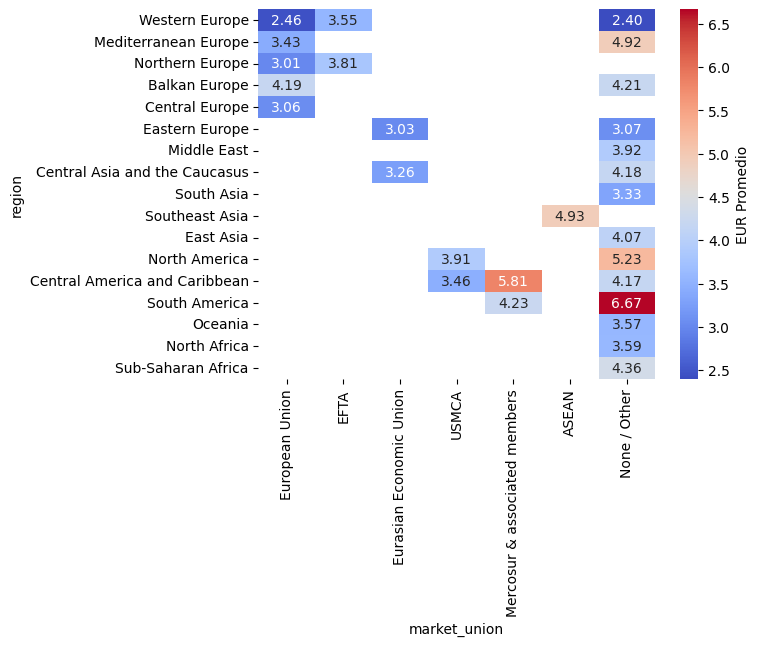

In [ ]:
pivot_table = pd.pivot_table(df_,
                             values='EUR_KG',
                             index='region',
                             columns='market_union',
                             aggfunc='median')

order_rows = ['Western Europe', 'Mediterranean Europe', 'Northern Europe', 'Balkan Europe',
              'Central Europe', 'Eastern Europe', 'Middle East',
              'Central Asia and the Caucasus', 'South Asia', 'Southeast Asia', 'East Asia',
              'North America', 'Central America and Caribbean', 'South America',
              'Oceania',
              'North Africa', 'Sub-Saharan Africa']
order_columns = ['European Union', 'EFTA', 'Eurasian Economic Union', 'USMCA',
                 'Mercosur & associated members', 'ASEAN', 'None / Other']

pivot_table = pivot_table.loc[order_rows, order_columns]

sns.heatmap(pivot_table, annot=True, cmap='coolwarm', fmt='.2f', cbar_kws={'label': 'EUR Mediana'})
plt.show()



##**3.2.4 | AVERAGE/MEDIAN DEMAND: REGION VS ECONOMIC UNION**

In [ ]:
df[(df['region']=='Western Europe') &
   (df['market_union']=='None / Other')]['country'].unique()

array(['United Kingdom'], dtype=object)

* **MEDIAN**

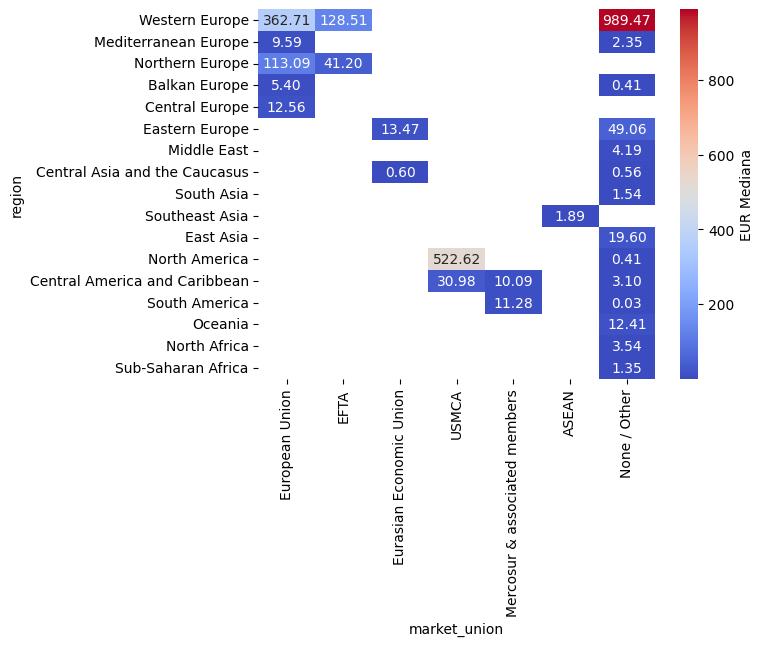

In [ ]:
pivot_table = pd.pivot_table(df_,
                             values='TON',
                             index='region',
                             columns='market_union',
                             aggfunc='median')

order_rows = ['Western Europe', 'Mediterranean Europe', 'Northern Europe', 'Balkan Europe',
              'Central Europe', 'Eastern Europe', 'Middle East',
              'Central Asia and the Caucasus', 'South Asia', 'Southeast Asia', 'East Asia',
              'North America', 'Central America and Caribbean', 'South America',
              'Oceania',
              'North Africa', 'Sub-Saharan Africa']
order_columns = ['European Union', 'EFTA', 'Eurasian Economic Union', 'USMCA',
                 'Mercosur & associated members', 'ASEAN', 'None / Other']

pivot_table = pivot_table.loc[order_rows, order_columns]

sns.heatmap(pivot_table, annot=True, cmap='coolwarm', fmt='.2f', cbar_kws={'label': 'EUR Mediana'})
plt.show()

* **AVG**

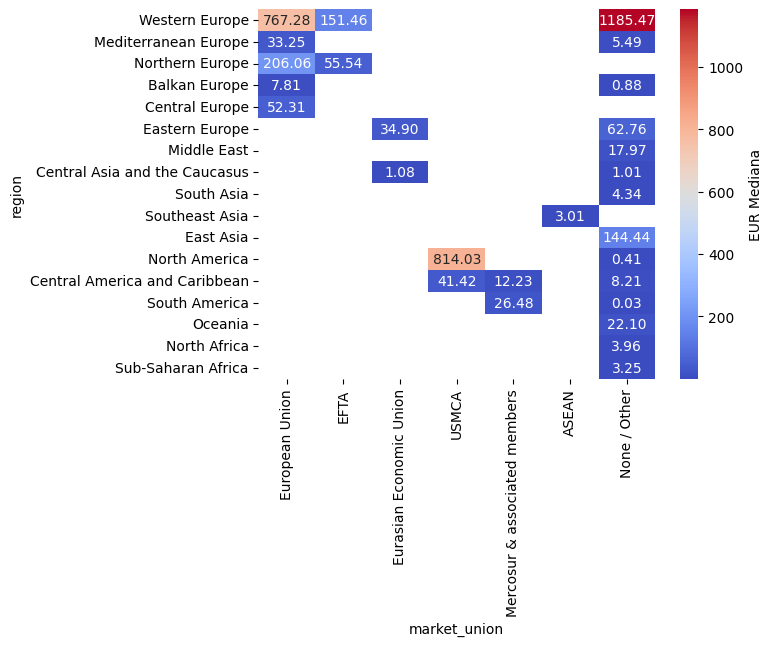

In [ ]:
pivot_table = pd.pivot_table(df_,
                             values='TON',
                             index='region',
                             columns='market_union',
                             aggfunc='mean')

order_rows = ['Western Europe', 'Mediterranean Europe', 'Northern Europe', 'Balkan Europe',
              'Central Europe', 'Eastern Europe', 'Middle East',
              'Central Asia and the Caucasus', 'South Asia', 'Southeast Asia', 'East Asia',
              'North America', 'Central America and Caribbean', 'South America',
              'Oceania',
              'North Africa', 'Sub-Saharan Africa']
order_columns = ['European Union', 'EFTA', 'Eurasian Economic Union', 'USMCA',
                 'Mercosur & associated members', 'ASEAN', 'None / Other']

pivot_table = pivot_table.loc[order_rows, order_columns]

sns.heatmap(pivot_table, annot=True, cmap='coolwarm', fmt='.2f', cbar_kws={'label': 'EUR Mediana'})
plt.show()

##**3.2.5 | DEMAND PER REGION YEAR/MONTH**

* **YEAR**

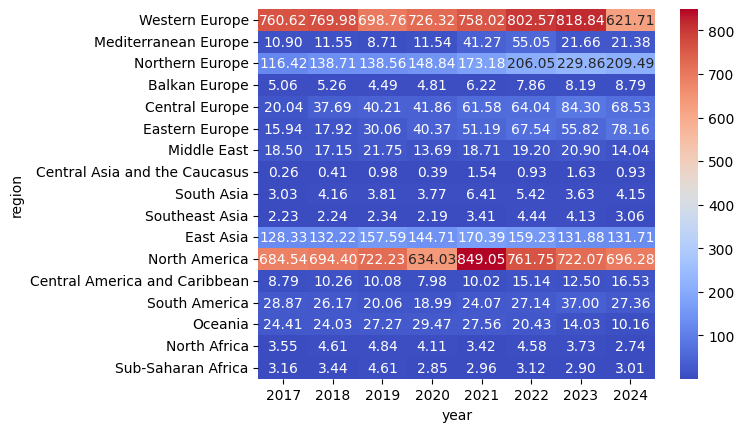

In [ ]:
pivot_table = pd.pivot_table(df_,
                             values='TON',
                             index='region',
                             columns='year',
                             aggfunc='mean'
                             )

order_rows = ['Western Europe', 'Mediterranean Europe', 'Northern Europe', 'Balkan Europe',
              'Central Europe', 'Eastern Europe', 'Middle East',
              'Central Asia and the Caucasus', 'South Asia', 'Southeast Asia', 'East Asia',
              'North America', 'Central America and Caribbean', 'South America',
              'Oceania',
              'North Africa', 'Sub-Saharan Africa']
order_columns = [2017,2018,2019,2020,2021,2022,2023,2024]

pivot_table = pivot_table.loc[order_rows, order_columns]

sns.heatmap(pivot_table, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

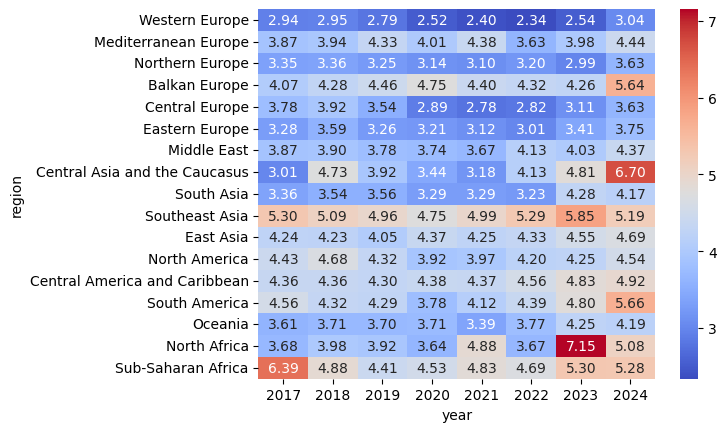

In [ ]:
pivot_table = pd.pivot_table(df_,
                             values='EUR_KG',
                             index='region',
                             columns='year',
                             aggfunc='mean'
                             )

order_rows = ['Western Europe', 'Mediterranean Europe', 'Northern Europe', 'Balkan Europe',
              'Central Europe', 'Eastern Europe', 'Middle East',
              'Central Asia and the Caucasus', 'South Asia', 'Southeast Asia', 'East Asia',
              'North America', 'Central America and Caribbean', 'South America',
              'Oceania',
              'North Africa', 'Sub-Saharan Africa']
order_columns = [2017,2018,2019,2020,2021,2022,2023,2024]

pivot_table = pivot_table.loc[order_rows, order_columns]

sns.heatmap(pivot_table, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

* **MONTH**

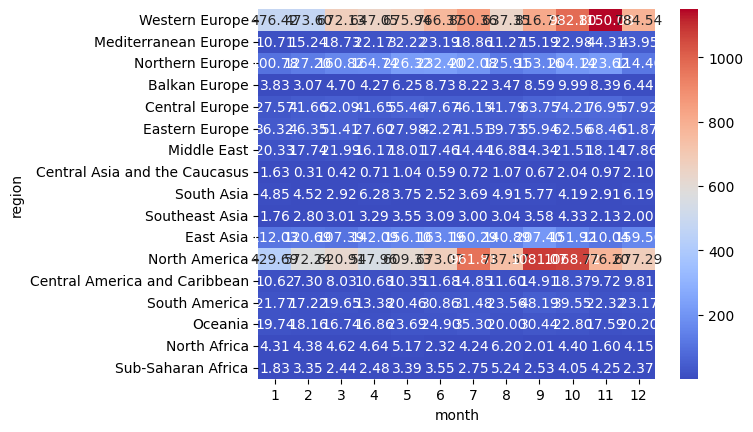

In [ ]:
pivot_table = pd.pivot_table(df_,
                             values='TON',
                             index='region',
                             columns='month',
                             aggfunc='mean'
                             )

order_rows = ['Western Europe', 'Mediterranean Europe', 'Northern Europe', 'Balkan Europe',
              'Central Europe', 'Eastern Europe', 'Middle East',
              'Central Asia and the Caucasus', 'South Asia', 'Southeast Asia', 'East Asia',
              'North America', 'Central America and Caribbean', 'South America',
              'Oceania',
              'North Africa', 'Sub-Saharan Africa']
order_columns = [1,2,3,4,5,6,7,8,9,10,11,12]

pivot_table = pivot_table.loc[order_rows, order_columns]

sns.heatmap(pivot_table, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

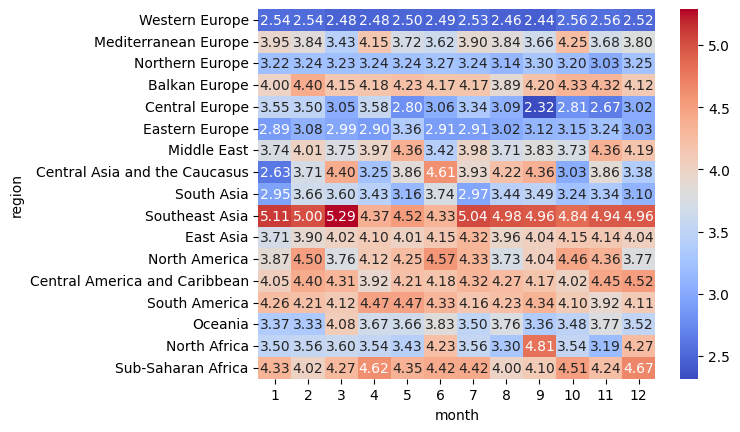

In [ ]:
pivot_table = pd.pivot_table(df_,
                             values='EUR_KG',
                             index='region',
                             columns='month',
                             aggfunc='median'
                             )

order_rows = ['Western Europe', 'Mediterranean Europe', 'Northern Europe', 'Balkan Europe',
              'Central Europe', 'Eastern Europe', 'Middle East',
              'Central Asia and the Caucasus', 'South Asia', 'Southeast Asia', 'East Asia',
              'North America', 'Central America and Caribbean', 'South America',
              'Oceania',
              'North Africa', 'Sub-Saharan Africa']
order_columns = [1,2,3,4,5,6,7,8,9,10,11,12]

pivot_table = pivot_table.loc[order_rows, order_columns]

sns.heatmap(pivot_table, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

#**4. PICKLE**

In [ ]:
path_pickle = ''

In [ ]:
df.to_csv(path_pickle, index=False)